### Problem Set 5: Text Mining
<br>
<br>
Di Tong
<br>
<br>

In [149]:
# import packages
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import shorttext
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from afinn import Afinn

GENERAL NLP/PREPROCESSING
<br>
1. Load the platforms.csv file containing the 2016 Democratic and Republican party platforms. Note the 2X2 format, where each row is a document, with the party recorded as a separate feature. Also, load the individual party .txt files as a corpus.
<br>

In [43]:
# read in csv file
data = pd.read_csv('/Users/ditong/Documents/uml/Problem-Set-5/Party Platforms Data/platforms.csv')
demo_text = open('/Users/ditong/Documents/uml/Problem-Set-5/Party Platforms Data/d16.txt', 'r').read()
rep_text = open('/Users/ditong/Documents/uml/Problem-Set-5/Party Platforms Data/r16.txt', 'r').read()

2. Create a document-term matrix and preprocess the platforms by the following criteria (at a minimum):
a. Convert to lowercase
b. Remove the stopwords c. Remove the numbers
d. Remove all punctuation e. Remove the whitespace

In [44]:
# defining document ids
docids = list(data['party'])
# tokenize the texts and build the corpus
corpus = [text.split(' ') for text in data['platform']]

In [45]:
# Create a document-term matrix
dtm = shorttext.utils.DocumentTermMatrix(corpus, docids=docids, tfidf=False)

In [46]:
# randomly inspect the number of occurrences of a particular word of all documents
dtm.get_token_occurences('people')

{'democrat': 18.0, 'republican': 11.0}

In [47]:
# read in the stop words dictionary
stop_words = stopwords.words('english')

# build the preprocessing function
def preprocess(text):
    '''
    Preprocess the text by tokenizing the string into lowercase uni-grams, removing all 
    numbers, punctuations, additional whitespaces, stop words and tokens 
    with only one character. Store the preprocessed sting into two formats:
    a list of words.
    
    input: 
        text: text for preprocessing(str)
    outputs: a list of words 
    '''
    # remove additional white spaces
    text = " ".join(text.split())
    # replace all digits with empty strings
    text = re.sub(r'\d+', '', text)
    # tokenize, remove stop words (including punctuations) and convert to lower case 
    result_lst = []
    tokens = gensim.utils.simple_preprocess(text)
    for token in tokens:
        # delete the stop words and all tokens with only one character,
        # append the rest to the rest list
        if token not in stop_words and len(token) > 1:
            result_lst.append(token)
    
    return result_lst

In [48]:
# preprocess the data
demo_lst =  preprocess(demo_text)
demo_cleaned = " ".join(demo_lst)
rep_lst = preprocess(rep_text)
rep_cleaned = " ".join(rep_lst)

3. Visually inspect your cleaned documents by creating a wordcloud for each major party’s platform. Based on this naive visualization, offer a few-sentence-description of general patterns you see (e.g., What are commonly used words? What are less commonly used words? Can you get a sense of differences between the parties at this early stage?

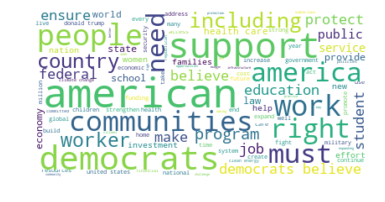

In [18]:
# wordcloud for the democratic party
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(demo_cleaned)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

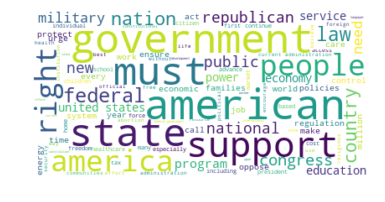

In [19]:
# wordcloud for the republican party
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(rep_cleaned)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

For the democracts, the most commonly used words are american/america, democracts, support, commuinities, right, work people, country, need, job; among these words, american/america, support, right, people and country also appear very frequentyly in the corpus for the republicans, while communities, work, job and need appear less commonly in the republicans corpus. Meanwhile, the words government, must, state, federal, republican, law, nation/national, military, economy and power appear much more frequently in the republicans corpus than the democrats corpus. It seems that the democrats emphasize more on work, employment and communities, while the republicans care more about the state power, administrative functions (in terms of military, economy, law, congress, etc.) and nationhood.

SENTIMENT ANALYSIS
4. Use the “Bing” and “AFINN” dictionaries to calculate the sentiment of each cleaned party platform. Present the results however you’d like (e.g., visually and/or numerically).

In [110]:
# load the "Bing" dictionary into a dictionary format
dic_bing = {}
with open('/Users/ditong/Documents/uml/Problem-Set-5/opinion-lexicon-English/positive-words.txt') as f1:
    for line in f1:
        dic_bing[line[:-1]] = 1
with open('/Users/ditong/Documents/uml/Problem-Set-5/opinion-lexicon-English/negative-words.txt', 
          encoding="ISO-8859-1") as f2:
    for line in f2:
        dic_bing[line[:-1]] = -1

In [119]:
# calculate the "Bing" sentiment score of the democrats
demo_sen_word_count = 0
demo_sum_sen_score = 0
for word in demo_lst:
    if word in dic_bing:
        demo_sen_word_count += 1
        demo_sum_sen_score += dic_bing[word]
demo_sen = demo_sum_sen_score / demo_sen_word_count
print("The Bing sentiment score of the democrats is ", demo_sen)

The Bing sentiment score of the democrats is  0.26770601336302896


In [120]:
# calculate the "Bing" sentiment score of the republicans
rep_sen_word_count = 0
rep_sum_sen_score = 0
for word in rep_lst:
    if word in dic_bing:
        rep_sen_word_count += 1
        rep_sum_sen_score += dic_bing[word]
rep_sen = rep_sum_sen_score / rep_sen_word_count
print("The Bing sentiment score of the republicans is ", rep_sen)

The Bing sentiment score of the republicans is  0.12513070756361103


In [144]:
# load the "AFINN" dictionary into a dictionary format
dic_afinn = {}
with open('/Users/ditong/Documents/uml/Problem-Set-5/AFINN/AFINN-111.txt') as f:
    for line in f:
        line = line.split('\t')
        if line[1][-1:] == '\n':
            dic_afinn[line[0]] = int(line[1][:-1])
        else:
            dic_afinn[line[0]] = int(line[1])

In [145]:
# calculate the "AFINN" sentiment score of the democrats
demo_afinn_word_count = 0
demo_sum_afinn_score = 0
for word in demo_lst:
    if word in dic_afinn:
        demo_afinn_word_count += 1
        demo_sum_afinn_score += dic_afinn[word]
demo_afinn = demo_sum_afinn_score / demo_afinn_word_count
print("The AFINN sentiment score of the democrats is ", demo_afinn)

The AFINN sentiment score of the democrats is  0.5699286014279714


In [146]:
# calculate the "AFINN" sentiment score of the republicans
rep_afinn_word_count = 0
rep_sum_afinn_score = 0
for word in rep_lst:
    if word in dic_afinn:
        rep_afinn_word_count += 1
        rep_sum_afinn_score += dic_afinn[word]
rep_afinn = rep_sum_afinn_score / rep_afinn_word_count
print("The AFINN sentiment score of the republicans is ", rep_afinn)

The AFINN sentiment score of the republicans is  0.3502016868353502


TOPIC MODELS
6. With a general sense of sentiments of the party platforms (i.e., the tones related to how parties talk about their roles in the political future), now explore the topics they are highlighting in their platforms. This will give a sense of the key policy areas they’re most interested in. Fit a topic model for each of the major parties (i.e. two topic models) using the latent Dirichlet allocation algorithm, initialized at k = 5 topics as a start. Present the results however you’d like (e.g., visually and/or numerically).

In [49]:
# split the dataframe
demo_df = data[data['party']=='democrat']
rep_df = data[data['party']=='republican']
# store the pre-processed text in dataframe format
cleaned_demo_df = demo_df['platform'].map(preprocess)
cleaned_rep_df = rep_df['platform'].map(preprocess)

In [55]:
# Construct the function that builds the lda model with 10 topics
def lda_model(corpus, dictionary, k):
    '''
    Build a lda model with 10 topics using the corpus and dictionary
    imput:
        corpus: the Term Document Frequency corpus used to build the mode
        dictionary: a dictionary containing word counts of each unique word
                    in the dataframe for each decade
    output: a lda model object
    '''
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=1)
    return lda_model

In [56]:
#  Fit a topic model for the democratic party
# Create Dictionaries for unique word counts of each decade
demo_dic_all = corpora.Dictionary(cleaned_demo_df)

# Create Corpus: Term Document Frequency
demo_corpus_all = [demo_dic_all.doc2bow(text) for text in (cleaned_demo_df)]

# fit the topic model
lda_5_demo = lda_model(demo_corpus_all, demo_dic_all, 5)

In [60]:
# present the results
lda_5_demo.show_topics(num_words=15, formatted=False)

[(0,
  [('democrats', 0.011391493),
   ('workers', 0.00859263),
   ('jobs', 0.0071707163),
   ('make', 0.006258968),
   ('america', 0.0061715227),
   ('work', 0.0060809944),
   ('believe', 0.0060509644),
   ('americans', 0.005641634),
   ('support', 0.005348826),
   ('people', 0.005070911),
   ('american', 0.0047008037),
   ('housing', 0.004666699),
   ('economic', 0.004632262),
   ('class', 0.0042678015),
   ('security', 0.0041238167)]),
 (1,
  [('democrats', 0.012877261),
   ('workers', 0.008820616),
   ('believe', 0.00814868),
   ('support', 0.0076492503),
   ('people', 0.006950458),
   ('americans', 0.006770819),
   ('american', 0.006122429),
   ('work', 0.005731331),
   ('america', 0.0051261326),
   ('jobs', 0.0044040554),
   ('security', 0.0043474864),
   ('create', 0.004328466),
   ('class', 0.004211089),
   ('rights', 0.0041665193),
   ('country', 0.0041023423)]),
 (2,
  [('democrats', 0.008528221),
   ('workers', 0.007105491),
   ('americans', 0.0061608297),
   ('believe', 0.0

In [34]:
#  Fit a topic model for the republican party
# Create Dictionaries for unique word counts of each decade
rep_dic_all = corpora.Dictionary(cleaned_rep_df)

# Create Corpus: Term Document Frequency
rep_corpus_all = [demo_dic_all.doc2bow(text) for text in (cleaned_rep_df)]

# fit the topic model
lda_5_rep = lda_model(rep_corpus_all, rep_dic_all, 5)

In [61]:
# present the results
lda_5_rep.show_topics(num_words=15, formatted=False)

[(0,
  [('expense', 0.0006775098),
   ('alone', 0.00067750976),
   ('ended', 0.0006775095),
   ('many', 0.00067750923),
   ('almost', 0.0006775092),
   ('respect', 0.0006775092),
   ('build', 0.00067750877),
   ('added', 0.00067750865),
   ('destroy', 0.0006775086),
   ('lame', 0.0006775086),
   ('multilateral', 0.0006775084),
   ('fair', 0.00067750836),
   ('engineer', 0.0006775083),
   ('along', 0.0006775081),
   ('landscaping', 0.0006775081)]),
 (1,
  [('expense', 0.0010182359),
   ('alone', 0.0009426753),
   ('ended', 0.0009363552),
   ('almost', 0.0009334762),
   ('many', 0.0008888489),
   ('fair', 0.0008662008),
   ('build', 0.0008648453),
   ('lame', 0.0008484893),
   ('destroy', 0.0008440014),
   ('along', 0.0008213423),
   ('respect', 0.0008211438),
   ('consequences', 0.0008049452),
   ('landscaping', 0.00080231734),
   ('engineer', 0.0007972474),
   ('multilateral', 0.00079262577)]),
 (2,
  [('ended', 0.00067751936),
   ('expense', 0.00067751785),
   ('destroy', 0.0006775171

7. Describe the general trends in topics that emerge from this stage. Are the parties focusing on similar or different topics, generally?
<br>
<br>
The five topics generated from the democrats corpus overlap with each other a lot, but thery are basically about work and employment, social security, housing, economic wellbeing and class dynamics. The five topics generated from the republicans corpus also overlap with each other a lot, but thery are basically about administrative and governmental actions, business and fiscal situation as well as fairness. Obviously the parties focuses on very different topics.

8. Fit 6 more topic models at the follow levels of k for each party: 5, 10, 25. Present the results however you’d like (e.g., visually and/or numerically).

In [63]:
# fit 2 more topic models for the democratic party (10 & 25 topics)
lda_10_demo = lda_model(demo_corpus_all, demo_dic_all, 10)
lda_25_demo = lda_model(demo_corpus_all, demo_dic_all, 25)

In [66]:
# present the results for the 10-topics model
lda_10_demo.show_topics(num_topics=10, num_words=15, formatted=False)

[(0,
  [('democrats', 0.010065447),
   ('workers', 0.0075108744),
   ('jobs', 0.006185108),
   ('work', 0.0059132776),
   ('america', 0.0058480124),
   ('americans', 0.0050614453),
   ('believe', 0.0049342406),
   ('make', 0.004911996),
   ('support', 0.004874976),
   ('people', 0.0045262664),
   ('american', 0.004086437),
   ('economic', 0.0040559424),
   ('security', 0.0039676474),
   ('country', 0.0038196575),
   ('class', 0.0037878659)]),
 (1,
  [('democrats', 0.012475571),
   ('workers', 0.0084331455),
   ('support', 0.0075804987),
   ('believe', 0.0072170966),
   ('people', 0.0067357314),
   ('americans', 0.0066099484),
   ('work', 0.0060819127),
   ('american', 0.0057659945),
   ('america', 0.005300271),
   ('security', 0.004536549),
   ('create', 0.00434431),
   ('country', 0.004286282),
   ('jobs', 0.0041546375),
   ('economy', 0.004088628),
   ('class', 0.0040485584)]),
 (2,
  [('democrats', 0.0075387936),
   ('workers', 0.006212719),
   ('americans', 0.005505992),
   ('ameri

In [68]:
# present the results
lda_25_demo.show_topics(num_topics=25, num_words=15, formatted=False)

[(0,
  [('democrats', 0.011214006),
   ('workers', 0.0085690245),
   ('jobs', 0.0069918633),
   ('work', 0.0067158677),
   ('america', 0.006313656),
   ('americans', 0.0058807605),
   ('support', 0.0054421164),
   ('make', 0.0054124966),
   ('believe', 0.005336254),
   ('people', 0.0047957795),
   ('american', 0.004687317),
   ('economic', 0.0046479236),
   ('country', 0.0045375032),
   ('create', 0.004499193),
   ('housing', 0.0043584947)]),
 (1,
  [('democrats', 0.013127734),
   ('workers', 0.009100261),
   ('support', 0.008052926),
   ('believe', 0.0074191377),
   ('americans', 0.0072998246),
   ('people', 0.006789358),
   ('work', 0.0065404954),
   ('american', 0.0063082324),
   ('america', 0.0054116677),
   ('create', 0.004983073),
   ('country', 0.0048511676),
   ('jobs', 0.0044261864),
   ('security', 0.004404994),
   ('class', 0.0043132748),
   ('rights', 0.0042282883)]),
 (2,
  [('democrats', 0.0061386093),
   ('workers', 0.005216317),
   ('americans', 0.004748343),
   ('suppo

In [69]:
# fit 2 more topic models for the republican party (10 & 25 topics)
lda_10_rep = lda_model(rep_corpus_all, rep_dic_all, 10)
lda_25_rep = lda_model(rep_corpus_all, rep_dic_all, 25)

In [70]:
# present the results for the 10-topics model
lda_10_rep.show_topics(num_topics=10, num_words=15, formatted=False)

[(0,
  [('alone', 0.011176402),
   ('expense', 0.01039189),
   ('almost', 0.009989471),
   ('ended', 0.008692828),
   ('fair', 0.00804842),
   ('destroy', 0.007837384),
   ('build', 0.007219824),
   ('respect', 0.0069676563),
   ('designs', 0.0063235965),
   ('landscaping', 0.0060436227),
   ('lame', 0.005901546),
   ('institution', 0.005515142),
   ('half', 0.0054916805),
   ('many', 0.005482565),
   ('consequences', 0.005391567)]),
 (1,
  [('alone', 0.009142474),
   ('expense', 0.007505208),
   ('ended', 0.007265866),
   ('lame', 0.005948201),
   ('build', 0.0055231024),
   ('almost', 0.005427509),
   ('respect', 0.0049501373),
   ('many', 0.004847838),
   ('added', 0.004795973),
   ('fair', 0.004600376),
   ('one', 0.0044873576),
   ('destroy', 0.00433993),
   ('bankruptcy', 0.004140511),
   ('republicans', 0.003869219),
   ('consequences', 0.0038420286)]),
 (2,
  [('alone', 0.008630798),
   ('expense', 0.0071406486),
   ('ended', 0.0060810936),
   ('respect', 0.0048451717),
   ('fa

In [71]:
# present the results
lda_25_rep.show_topics(num_topics=25, num_words=15, formatted=False)

[(0,
  [('alone', 0.011648025),
   ('expense', 0.011461483),
   ('almost', 0.011053193),
   ('ended', 0.009333754),
   ('destroy', 0.008836273),
   ('fair', 0.008370492),
   ('build', 0.007875847),
   ('respect', 0.007746216),
   ('designs', 0.0069355373),
   ('landscaping', 0.0069311964),
   ('lame', 0.0061599547),
   ('many', 0.006035043),
   ('half', 0.0057981885),
   ('consequences', 0.005622058),
   ('controls', 0.0055626146)]),
 (1,
  [('alone', 0.008754547),
   ('expense', 0.0075985272),
   ('ended', 0.0071738632),
   ('lame', 0.005730104),
   ('build', 0.005545538),
   ('almost', 0.005513852),
   ('respect', 0.0050627207),
   ('many', 0.004920995),
   ('added', 0.004686925),
   ('destroy', 0.004493838),
   ('fair', 0.0044144364),
   ('one', 0.0043553994),
   ('bankruptcy', 0.0040787132),
   ('republicans', 0.003973472),
   ('consequences', 0.0037081374)]),
 (2,
  [('alone', 0.01287008),
   ('expense', 0.011199418),
   ('ended', 0.009236926),
   ('respect', 0.0075448905),
   ('m

9. Calculate the perplexity of each model iteration and describe which technically fits best.

In [75]:
print("Perplexity score for 5-topics model for the democrats:", lda_5_demo.log_perplexity(demo_corpus_all)) 
print("Perplexity score for 10-topics model for the democrats:", lda_10_demo.log_perplexity(demo_corpus_all)) 
print("Perplexity score for 25-topics model for the democrats:", lda_25_demo.log_perplexity(demo_corpus_all))

Perplexity score for 5-topics model for the democrats: -8.08881875818426
Perplexity score for 10-topics model for the democrats: -9.313545517409143
Perplexity score for 25-topics model for the democrats: -13.434492260956567


In [76]:
print("Perplexity score for 5-topics model for the replublicans:", lda_5_rep.log_perplexity(rep_corpus_all))
print("Perplexity score for 10-topics model for the replublicans:", lda_10_rep.log_perplexity(rep_corpus_all))
print("Perplexity score for 25-topics model for the replublicans:", lda_25_rep.log_perplexity(rep_corpus_all))

Perplexity score for 5-topics model for the replublicans: -6.670371321888713
Perplexity score for 10-topics model for the replublicans: -8.025227482848205
Perplexity score for 25-topics model for the replublicans: -10.843098848191913


Since lower perplexity means that the model technically performs better, for both democrats and republicans, the 25-topics models technically fit best.

10. Building on the previous question, display a barplot of the k = 10 model for each party, and offer some general inferences as to the main trends that emerge. Are there similar themes between the parties? Do you think k = 10 likely picks up differences more efficiently? Why or why not?


In [147]:
# construct the function to graph Word Counts of Topic Keywords for all ten topics 
#reference: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
def graph_topic_keyword_count(model, dataframe):
    '''
    Build graphs for the ten topics identified by the lda model based on the
    dataframe, each graph present the counts and weights of the keywords of
    the topic, save the graphs in the visualization folder.

    input: 
        model: the LDA model that identifies the ten topics based on the dataframe
        dataframe: the dataframe used by the LDA model to identify topics
        era: (str) the party (e.g. '70s')
    '''
    
    # Get a list of topics with word-probability pairs for each
    topics = model.show_topics(formatted=False)
    # count how frequently a word appears in the document
    data_flat = [w for w_list in dataframe for w in w_list]
    counter = Counter(data_flat)
    # store the word, topic, word weight and word count into a list
    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i, weight, counter[word]])
    # transform the list into a pandas dataframe
    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
    
    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :],\
                color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :],\
                    color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, \
                            horizontalalignment= 'right')
        ax.legend(loc='upper left')
        ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    plt.show()
   

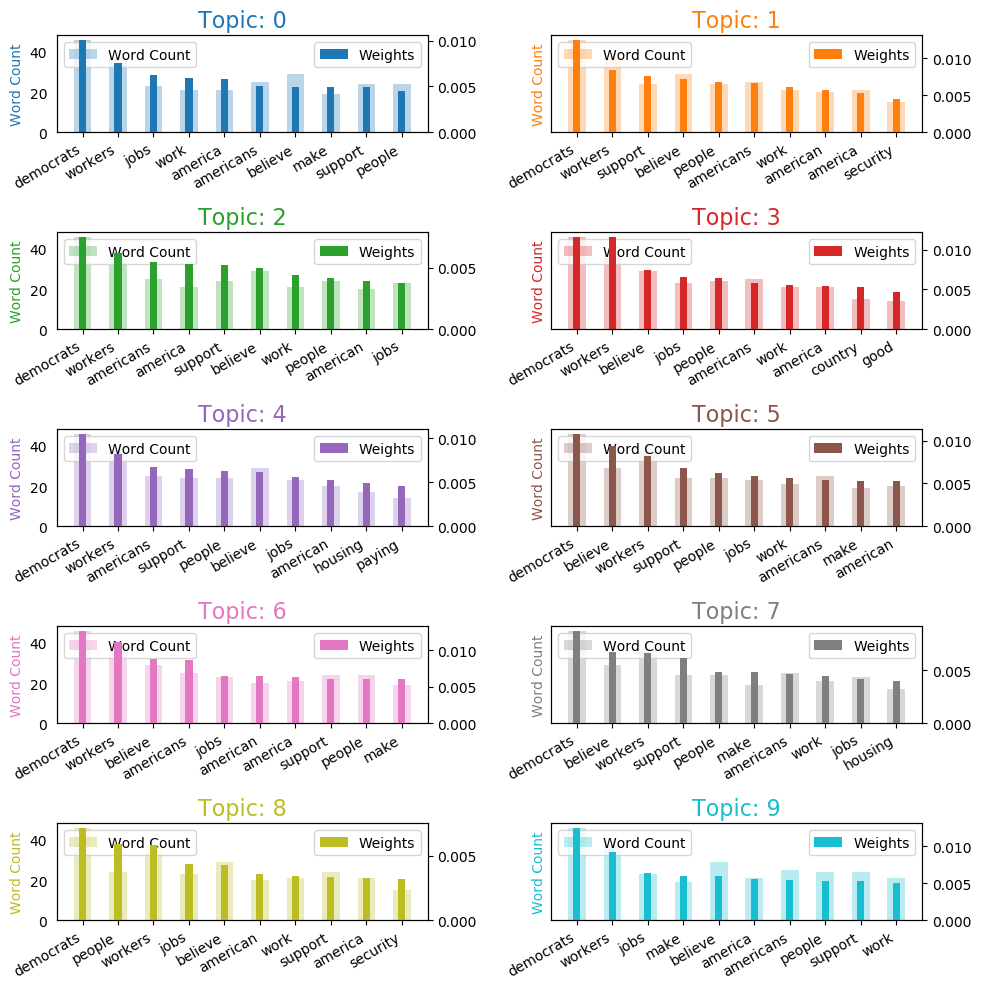

In [150]:
# display a barplot of the k = 10 model for the democrats
graph_topic_keyword_count(lda_10_demo, cleaned_demo_df)

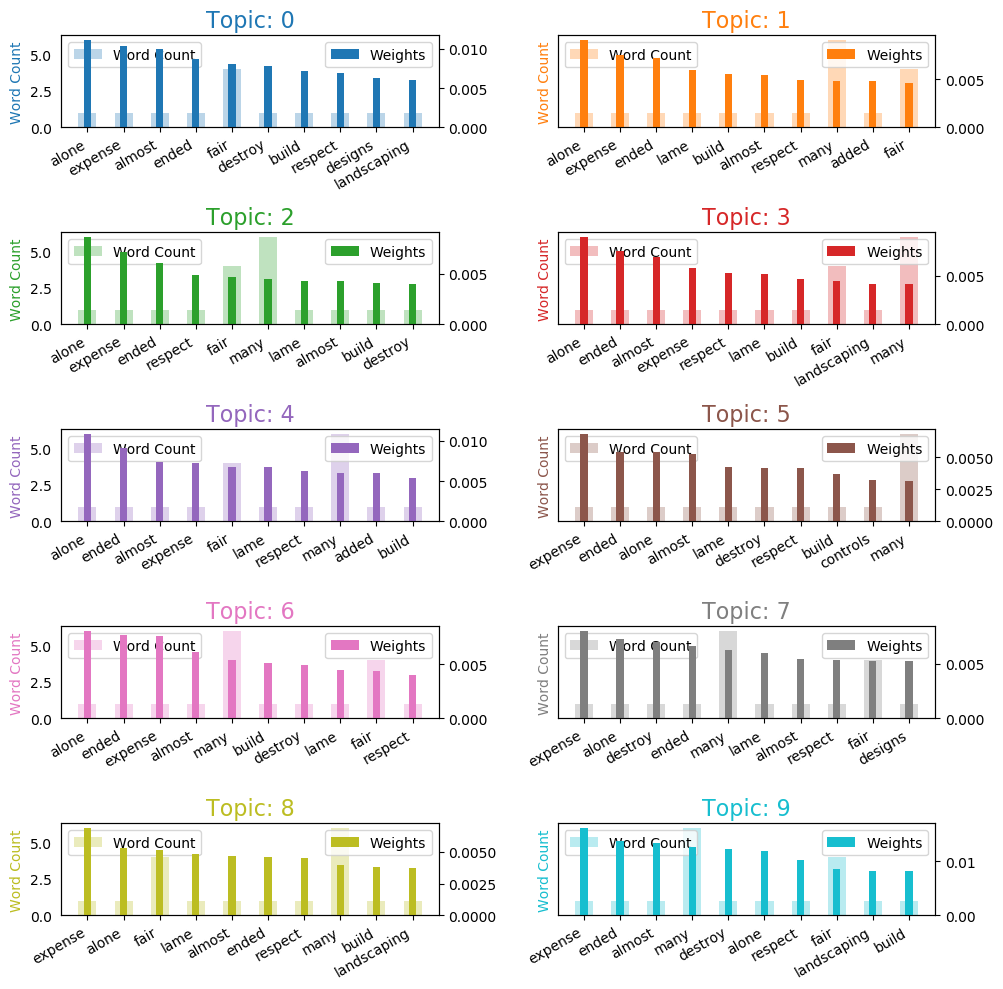

In [151]:
# display a barplot of the k = 10 model for the republicans
graph_topic_keyword_count(lda_10_rep, cleaned_rep_df)

I don't think the 10-topics models perform better than the 5-topics ones. For the 10-topics lda on the democrats corpus, there are a lot of topics that look very similar to each other, e.g., topic 6 and topic 9. The same thing happens for the republicans corpus. Of course, the themes are totally different between the two parties: the democrats focus on work and employment, social security, housing and economic wellbeing; the republicans focuses on administrative and governmental actions, business and fiscal situation as well as fairness. These are already captured by the 5-topics model, or maybe models with even less topics can do the job too. So k = 10 is not an efficient model to pick up differences between the parties.

CONCLUSION
11. Per the opening question, based on your analyses (including exploring party brands, general tones/sentiments, political outlook, and policy priorities), which party would you support in the 2020 election (again, this is hypothetical)?

I would support the democratic party. The wordcloud shows that the democrats bring up more often words related to social services and people's livelihood, whereas the republicans care more about the abstract level state power. Besides, the sentiment of the democracts is more positive than the republicans, possibly suggesting a brighter future under their rein. The topic models reveal the similar trends as the word cloud--the democracts put policy priorities on the concrete and society/people-oriented services to ensure people's wellbeing and maybe to address economic inequality; the republicans'policy priorities are not only more abstract, hollow and on the administrative level, but also concerned with the economic interests of the business companies and the government. Hence, the republicans are less attractive than the democrats--it does not convince me that the various social problems would be alleviated and people's interests will be protected under their rein.